In [49]:
#import dependencies

import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

# Import the API key
from openweatherapikey import openweather_key

import warnings
warnings.filterwarnings("ignore")


In [50]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()


,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77


In [69]:
# Save config information.
url = "https://history.openweathermap.org/data/2.5/aggregated/month?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={openweather_key}&units={units}&q="

In [70]:
# List of cities
cities = ["London", "Rio", "Beijing", 
          "Sydney", "Barcelona", "Los Angeles", 
          "Montreal", "Mexico", "Rome", 
          "Helsinki", "Berlin", "Amsterdam", 
          "Antwerp", "Athens", "Atlanta",
          "Moscow", "Munich", "Tokyo",
          "Melbourne", "Stockholm", "St. Louis"]

# set up lists to hold response info
lat = []
long = []
start = []
end = []
temp = []
overcast = []

In [71]:

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    temp.append(response['result']['temp'])
    lat.append(response['coord']['lat'])
    overcast.append(response['clouds']['all'])

KeyError: 'main'

In [68]:
# create a DataFrame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    'all': overcast}

weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp,all
0,London,51.5085,10.56,75
1,Rio,38.3000,13.51,4
2,Beijing,39.9075,2.94,5
3,Sydney,-33.8679,23.92,75
4,Barcelona,41.3888,14.94,0
5,Los Angeles,34.0522,11.93,100
6,Montreal,45.5088,-0.54,40
7,Mexico,15.0646,29.52,58
8,Rome,34.2570,9.05,0
9,Helsinki,60.1695,-16.81,75


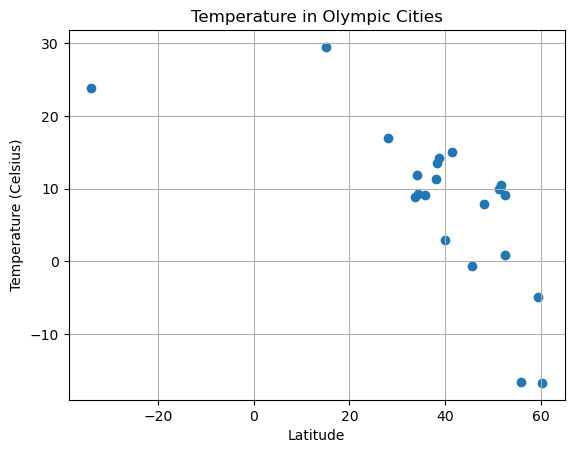

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in Olympic Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("OlympicCityTemps.png")

# Show plot
plt.show()